Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  4.37465736e+10   4.37465736e+10   4.37465736e+10]
  [  5.37622158e+09   5.37622158e+09   5.37622158e+09]
  [  6.63953369e+10   6.63953369e+10   6.63953369e+10]
  ..., 
  [  1.52832299e+07   1.52832299e+07   1.52832299e+07]
  [  1.42298493e+08   1.42298493e+08   1.42298493e+08]
  [  4.31537319e+07   4.31537319e+07   4.31537319e+07]]

 [[  3.25100923e+10   3.25100923e+10   3.25100923e+10]
  [  6.07142138e+08   6.07142138e+08   6.07142138e+08]
  [  1.98106836e+11   1.98106836e+11   1.98106836e+11]
  ..., 
  [  4.96184001e+07   4.96184001e+07   4.96184001e+07]
  [  2.60234721e+08   2.60234721e+08   2.60234721e+08]
  [  6.14018574e+07   6.14018574e+07   6.14018574e+07]]

 [[  2.66543407e+09   2.66543407e+09   2.66543407e+09]
  [  5.63766852e+09   5.63766852e+09   5.63766852e+09]
  [  1.10802343e+07   1.10802343e+07   1.10802343e+07]
  ..., 
  [  3.10948207e+06   3.10948207e+06   3.10948207e+06]
  [  1.74774169e+06   1.74774169e+06   1.74774169e+06]
  [  1.43983861e+05   1.43983861e+05 

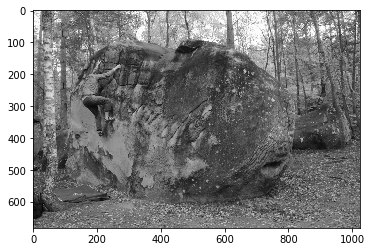

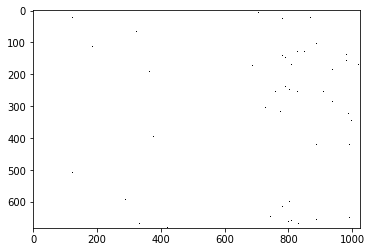

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import image_analysis as ima

def matrix_to_image(input_matrix):
    """
    """
    dummy_image = np.ones((input_matrix.shape[0],input_matrix.shape[1],3))/256
    matrix_reshaped = np.asarray(input_matrix[:,:,np.newaxis])   #Reshape the values from a 2D Array to an ndarray
    image = matrix_reshaped*dummy_image
    
    return(image)

image = plt.imread('Boulder_image.jpg')

A, gray_image = rgb_to_gray(image)
W = np.dot(A,A.transpose())
Wv = np.dot(A.transpose(),A)

W_eigenvalues, U = eig(W)
Wv_eigenvalues, V = eig(Wv)

S_entries = np.sqrt(W_eigenvalues)
S_entries_sorted = np.flip(np.sort(S_entries), axis=0)
sorting_indices_S = np.flip(np.argsort(S_entries), axis=0)

U_sorted = U[sorting_indices_S]

sorting_indices_V = np.flip(np.argsort(np.sqrt(Wv_eigenvalues)),axis=0)
V_sorted = V[sorting_indices_V]

selection = range(20)

for i in selection:
    U_tmp = np.reshape(U_sorted[:,i],(len(U_sorted[0,:]),1))
    V_tmp = np.reshape(V_sorted[:,i],(len(V_sorted[0,:]),1))
    SVD_temp = np.dot(U_tmp, V_tmp.transpose())
    SVD = SVD+SVD_temp*S_entries_sorted[i]

SVD = np.real(SVD)
resulting_image = matrix_to_image(SVD)
plt.figure(1)
plt.imshow(gray_image)
plt.figure(2)
plt.imshow(resulting_image)

print(resulting_image)
